In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv as csv
import seaborn as sns
%matplotlib inline 


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


In [75]:
train_df = pd.read_csv("C:/Users/HP/Downloads/titanic_train.csv")
test_df = pd.read_csv("C:/Users/HP/Downloads/titanic_test.csv")

In [34]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
print(train_df.shape)

(891, 12)


In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [36]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


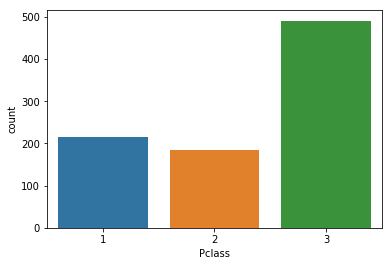

In [17]:
sns.countplot(x="Pclass",data=train_df)

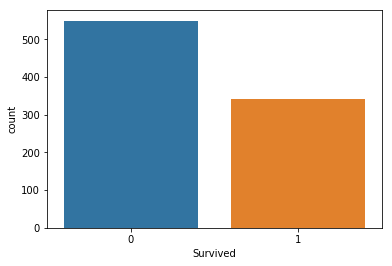

In [18]:
sns.countplot(x="Survived",data=train_df)

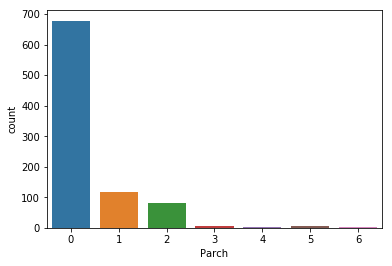

In [19]:
sns.countplot(x="Parch",data=train_df)

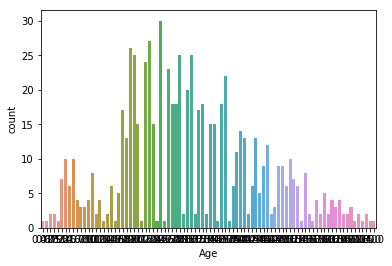

In [20]:
sns.countplot(x="Age",data=train_df)

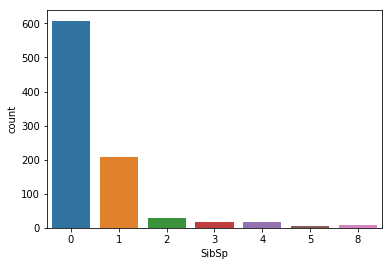

In [22]:
sns.countplot(x="SibSp",data=train_df)

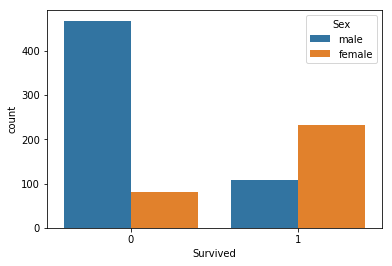

In [23]:
sns.countplot(x="Survived" , hue="Sex" , data=train_df)

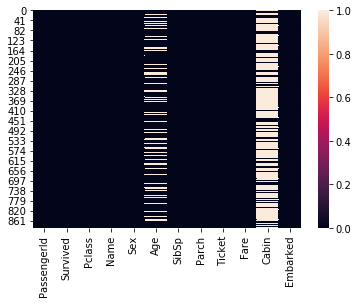

In [25]:
sns.heatmap(train_df.isnull())

In [16]:
df = pd.DataFrame(train_df)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [29]:
df['Pclass'].mean()

2.308641975308642

In [31]:
df['Age'].mean()

29.69911764705882

In [51]:
df.drop(['PassengerId','Name','Cabin','Ticket'],axis=1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [7]:
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [8]:
train_df['Sex']=train_df['Sex'].map({'male':1,'female':0}).astype(int)

In [10]:
train_df=train_df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [12]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [17]:
df.describe(include=['O'])

,Embarked
count,889
unique,3
top,S
freq,644


In [18]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
train_df['Embarked']=train_df['Embarked'].fillna("S")

In [20]:
train_df.describe(include=['O'])

,Embarked
count,891
unique,3
top,S
freq,646


In [21]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int32
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null int32
dtypes: float64(2), int32(2), int64(4)
memory usage: 48.8 KB


In [46]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [51]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [80]:
median_age=df['Age'].dropna().median()
df['Age']=df['Age'].fillna(median_age)


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int32
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null int32
dtypes: float64(2), int32(2), int64(4)
memory usage: 48.8 KB


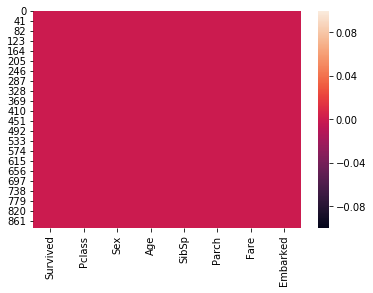

In [57]:
sns.heatmap(df.isnull())

In [58]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [74]:
test_df.head

<bound method NDFrame.head of      PassengerId  Pclass  Sex   Age  SibSp  Parch      Fare Embarked
0            892       3    1  34.5      0      0    7.8292        Q
1            893       3    0  47.0      1      0    7.0000        S
2            894       2    1  62.0      0      0    9.6875        Q
3            895       3    1  27.0      0      0    8.6625        S
4            896       3    0  22.0      1      1   12.2875        S
5            897       3    1  14.0      0      0    9.2250        S
6            898       3    0  30.0      0      0    7.6292        Q
7            899       2    1  26.0      1      1   29.0000        S
8            900       3    0  18.0      0      0    7.2292        C
9            901       3    1  21.0      2      0   24.1500        S
10           902       3    1   NaN      0      0    7.8958        S
11           903       1    1  46.0      0      0   26.0000        S
12           904       1    0  23.0      1      0   82.2667        S
13  

In [76]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [77]:
test_df=test_df.drop(['Name','Ticket','Cabin'],axis=1)

In [78]:
test_df['Sex'] = test_df['Sex'].map({'male':1,'female':'0'}).astype(int)

In [79]:
test_df['Embarked'] = test_df['Embarked'].map({'C':0, 'Q':1, 'S':2}).astype(int)

In [81]:
test_df['Age'] = test_df['Age'].fillna(median_age)

In [82]:
median_fare=test_df['Fare'].dropna().median()
test_df['Fare']=test_df['Fare'].fillna(median_fare)


In [83]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int32
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Embarked       418 non-null int32
dtypes: float64(2), int32(2), int64(4)
memory usage: 22.9 KB


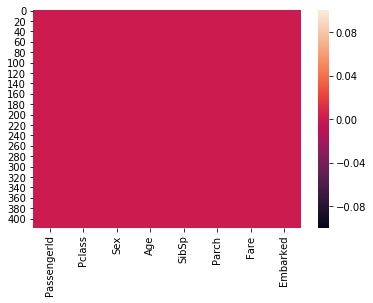

In [85]:
sns.heatmap(test_df.isnull())

In [90]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [92]:
X_train = df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
Y_train = df['Survived']

X_test = test_df[['Pclass','Sex','Age', 'SibSp', 'Parch', 'Fare','Embarked']]

#index
idx = test_df['PassengerId']

X_train.shape , Y_train.shape ,X_test.shape, idx.shape

((891, 7), (891,), (418, 7), (418,))

In [93]:
rf= RandomForestClassifier(n_estimators=100)
rf.fit(X_train,Y_train)

score_val = rf.score(X_train,Y_train)

print("Training score is :",score_val)

out_rf = rf.predict(X_test)

Training score is : 0.979797979798


In [94]:
out_rf

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [95]:
logreg = LogisticRegression()

logreg.fit(X_train,Y_train)
score_logreg = logreg.score(X_train,Y_train)

print("Training score is: ",score_logreg)

out_logreg  = logreg.predict(X_test)

Training score is:  0.803591470258


In [100]:
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)

score_knn = knn.score(X_train,Y_train)

print("Training score is: ",score_knn)

out_knn = knn.predict(X_test)

Training score is:  0.809203142536


In [101]:
svms = SVC()
svms.fit(X_train,Y_train)

score_svms = svms.score(X_train,Y_train)

print("Training score is: ",score_svms)

out_svms = svms.predict(X_test)

Training score is:  0.897867564534


In [102]:
submission = pd.DataFrame({"PassengerId":idx,"Survived":out_rf})

submission.to_csv('sub_titanic.csv',index=False)